In [1]:
# import useful libraries
import pandas as pd
import numpy as np
import scipy
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Data Overview


In [2]:
import pandas as pd
path = 'loan.csv'
df=pd.read_csv(path)
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

In [3]:
df.head(2)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [6]:
#  I focus into 2 scenarios: Fully paid and Charged-off
df['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

# Data cleaning

## Drop data

### Drop Current Rows in loan_status columns
>  I forcus in 2 main scenarios: CHARGED OFF and FUllY PAID 

In [7]:
# drop Current Status
df =df[(df['loan_status']!='Current')]

### Drop null values

In [8]:
# check null ratio
r_null = 100*(df.isnull().sum()/len((df)))
null_colummns = r_null[r_null > 0].sort_values(ascending = False)
print(f'number of columns with null values per total columns: {len(null_colummns)}/{len(df.columns)}')


number of columns with null values per total columns: 68/111


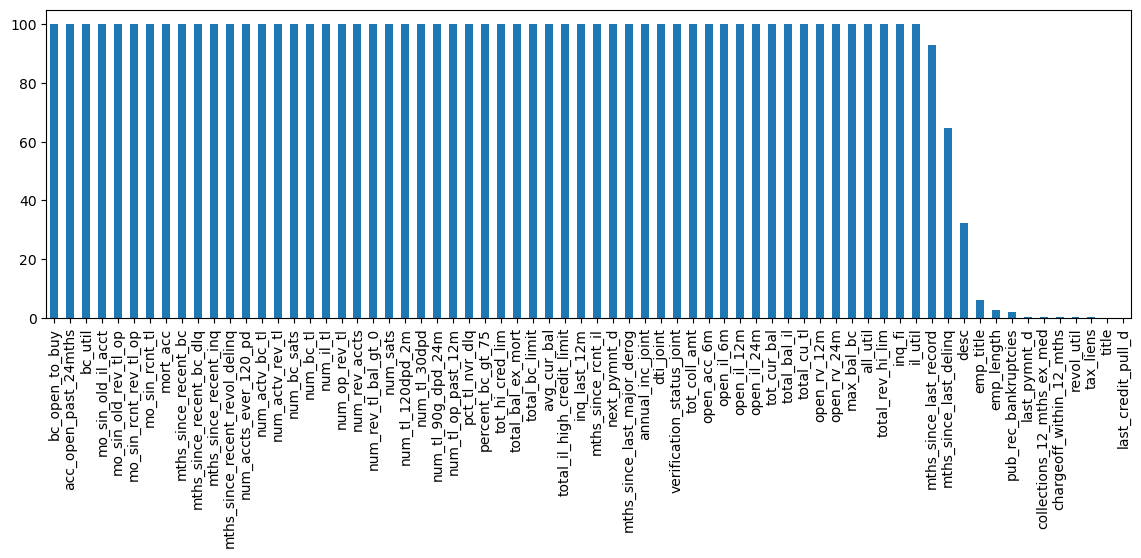

In [9]:
null_colummns.plot(kind='bar',figsize=(14,4))
plt.show()

In [10]:
null_colummns_90 = r_null[r_null > 90].sort_values(ascending = False)
print('number of columns with 90% null values:',len(null_colummns))
null_colummns_90

number of columns with 90% null values: 68


mo_sin_old_rev_tl_op              100.000000
next_pymnt_d                      100.000000
mo_sin_rcnt_tl                    100.000000
mort_acc                          100.000000
mths_since_recent_bc              100.000000
mths_since_recent_bc_dlq          100.000000
mths_since_recent_inq             100.000000
mths_since_recent_revol_delinq    100.000000
num_accts_ever_120_pd             100.000000
num_actv_bc_tl                    100.000000
num_actv_rev_tl                   100.000000
num_bc_sats                       100.000000
num_bc_tl                         100.000000
num_il_tl                         100.000000
num_op_rev_tl                     100.000000
num_rev_accts                     100.000000
num_rev_tl_bal_gt_0               100.000000
num_sats                          100.000000
num_tl_120dpd_2m                  100.000000
num_tl_30dpd                      100.000000
num_tl_90g_dpd_24m                100.000000
num_tl_op_past_12m                100.000000
pct_tl_nvr

In [11]:
df = df.drop(columns=null_colummns_90.index.to_list())
df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,161.03,Jan-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,80.90,Jun-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,281.94,Jul-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,0.00,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,0.00,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN


### drop columns with only one values

In [12]:
columns  = df.columns.to_list()
columns_vales_count = {c : len(df[c].value_counts().index.to_list()) for c in columns}
columns_vales_count

{'id': 38577,
 'member_id': 38577,
 'loan_amnt': 870,
 'funded_amnt': 1019,
 'funded_amnt_inv': 8050,
 'term': 2,
 'int_rate': 370,
 'installment': 15022,
 'grade': 7,
 'sub_grade': 35,
 'emp_title': 28027,
 'emp_length': 11,
 'home_ownership': 5,
 'annual_inc': 5215,
 'verification_status': 3,
 'issue_d': 55,
 'loan_status': 2,
 'pymnt_plan': 1,
 'url': 38577,
 'desc': 25803,
 'purpose': 14,
 'title': 19297,
 'zip_code': 822,
 'addr_state': 50,
 'dti': 2853,
 'delinq_2yrs': 11,
 'earliest_cr_line': 524,
 'inq_last_6mths': 9,
 'mths_since_last_delinq': 95,
 'open_acc': 40,
 'pub_rec': 5,
 'revol_bal': 21275,
 'revol_util': 1088,
 'total_acc': 82,
 'initial_list_status': 1,
 'out_prncp': 1,
 'out_prncp_inv': 1,
 'total_pymnt': 36714,
 'total_pymnt_inv': 36387,
 'total_rec_prncp': 6841,
 'total_rec_int': 34025,
 'total_rec_late_fee': 1320,
 'recoveries': 4040,
 'collection_recovery_fee': 2616,
 'last_pymnt_d': 101,
 'last_pymnt_amnt': 34418,
 'last_credit_pull_d': 106,
 'collections_12_m

In [13]:
# columns has only 1  values
one_value_column = [c for c,v in columns_vales_count.items() if v <2 ]
one_value_column

['pymnt_plan',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'collections_12_mths_ex_med',
 'policy_code',
 'application_type',
 'acc_now_delinq',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'tax_liens']

In [14]:
df = df.drop(columns=one_value_column)
df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,5632.21,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,1213.88,2500.00,322.97,0.00,0.00,0.00,Jul-10,80.90,Jun-10,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,1020.51,8500.00,1413.49,0.00,0.00,0.00,Jul-10,281.94,Jul-10,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,1397.12,5000.00,272.16,0.00,0.00,0.00,Apr-08,0.00,Jun-07,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,672.66,5000.00,174.20,0.00,0.00,0.00,Jan-08,0.00,Jun-07,NaN


### Drop unessecery columns:
1. id columns
2. columns with description meaning
3. columns which cannot be used for calculation
4. The columns have similar meanings

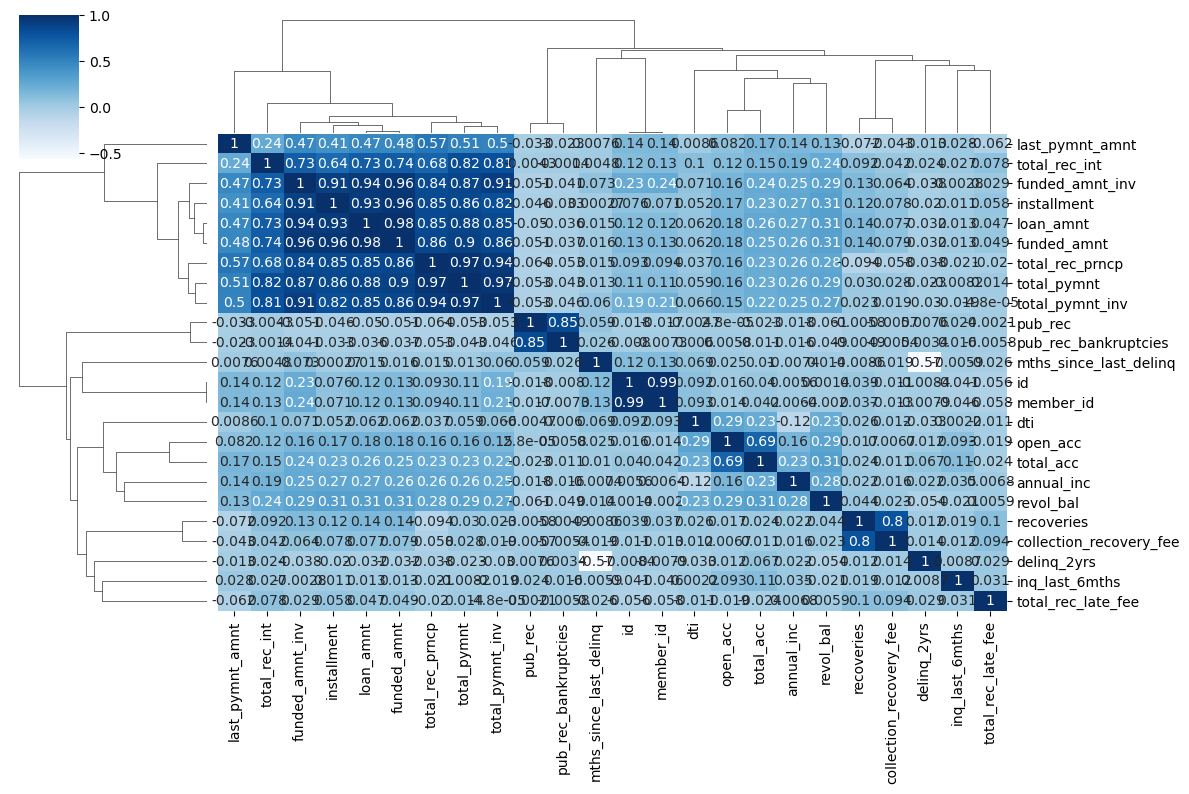

In [15]:
# base on Correlation Matrix to find similar-meaning-column-group
corr = df.corr()
sns.clustermap(corr, annot=True, figsize=(12, 8), cmap="Blues")
plt.show()

In [16]:

unnessesary_columns = ['url','member_id','id','emp_title','funded_amnt_inv','desc', 'title','sub_grade',
    'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
    'open_acc', 'pub_rec', 'revol_bal', 'total_acc', 
    'total_pymnt_inv', 'total_rec_prncp', 
    'total_rec_int', 'total_rec_late_fee', 'recoveries', 
    'collection_recovery_fee', 'last_pymnt_d', 
    'last_pymnt_amnt', 'last_credit_pull_d', 'addr_state' ]

In [17]:
df = df.drop(columns=unnessesary_columns)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   loan_amnt               38577 non-null  int64  
 1   funded_amnt             38577 non-null  int64  
 2   term                    38577 non-null  object 
 3   int_rate                38577 non-null  object 
 4   installment             38577 non-null  float64
 5   grade                   38577 non-null  object 
 6   emp_length              37544 non-null  object 
 7   home_ownership          38577 non-null  object 
 8   annual_inc              38577 non-null  float64
 9   verification_status     38577 non-null  object 
 10  issue_d                 38577 non-null  object 
 11  loan_status             38577 non-null  object 
 12  purpose                 38577 non-null  object 
 13  zip_code                38577 non-null  object 
 14  dti                     38577 non-null

##  Transform columns

In [18]:
df['term'].value_counts()

 36 months    29096
 60 months     9481
Name: term, dtype: int64

In [19]:
df['term'] = list(map(lambda x: int(x[:3]), df['term']))
df['term'].value_counts()


36    29096
60     9481
Name: term, dtype: int64

In [20]:
df['int_rate'].value_counts()

10.99%    913
11.49%    790
7.51%     787
13.49%    749
7.88%     725
         ... 
16.96%      1
18.36%      1
16.15%      1
16.01%      1
16.20%      1
Name: int_rate, Length: 370, dtype: int64

In [21]:
df['int_rate'] = df['int_rate'].apply(lambda x : float(x[:-1]))
df['int_rate'].value_counts()

10.99    913
11.49    790
7.51     787
13.49    749
7.88     725
        ... 
16.96      1
18.36      1
16.15      1
16.01      1
16.20      1
Name: int_rate, Length: 370, dtype: int64

In [22]:
list(df['revol_util'].value_counts().index)


['0%',
 '0.20%',
 '63%',
 '40.70%',
 '31.20%',
 '70.40%',
 '61%',
 '66.70%',
 '57.40%',
 '37.60%',
 '66.60%',
 '46.40%',
 '0.10%',
 '64.80%',
 '32%',
 '75.50%',
 '46.60%',
 '64.60%',
 '34.40%',
 '65.90%',
 '70.80%',
 '25.50%',
 '35.30%',
 '49.80%',
 '48.90%',
 '68.70%',
 '41%',
 '51.10%',
 '51.60%',
 '33.70%',
 '48%',
 '36.50%',
 '45.60%',
 '72.10%',
 '47.80%',
 '89.50%',
 '48.20%',
 '76.60%',
 '41.60%',
 '88%',
 '49.10%',
 '74.90%',
 '54.30%',
 '78.70%',
 '27.20%',
 '68.60%',
 '55.80%',
 '89.90%',
 '57.20%',
 '52.30%',
 '62.80%',
 '29.10%',
 '53.90%',
 '73.20%',
 '54.60%',
 '55.50%',
 '62%',
 '33.30%',
 '64.30%',
 '55.10%',
 '55.20%',
 '21.50%',
 '43.40%',
 '7.20%',
 '40.20%',
 '53.70%',
 '79.50%',
 '60.20%',
 '41.40%',
 '57.70%',
 '30.90%',
 '45.90%',
 '52.40%',
 '55.40%',
 '23%',
 '49.60%',
 '58.70%',
 '57.90%',
 '55.70%',
 '59.60%',
 '56.70%',
 '57.80%',
 '44.10%',
 '54%',
 '76%',
 '70.10%',
 '70.30%',
 '74.40%',
 '47.40%',
 '48.70%',
 '23.80%',
 '66.90%',
 '1%',
 '44.70%',
 '26.70

In [23]:
df['revol_util'] = df['revol_util'].str.rstrip('%').astype(float)
df['revol_util'].value_counts()

0.00     954
0.20      62
63.00     62
40.70     57
31.20     57
        ... 
77.63      1
25.74      1
0.83       1
47.36      1
7.28       1
Name: revol_util, Length: 1088, dtype: int64

In [24]:
df['emp_length'].value_counts()

10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64

In [25]:
df['emp_length'] = df['emp_length'].replace({'< 1 year': 0, '2 years': 2, '3 years': 3, 
                                                         '7 years': 7, '4 years': 4, '5 years': 5, 
                                                         '1 year': 1, '6 years': 6, '8 years': 8, 
                                                         '9 years': 9,  '10+ years': 10})

df['emp_length'].value_counts()

10.0    8488
0.0     4508
2.0     4291
3.0     4012
4.0     3342
5.0     3194
1.0     3169
6.0     2168
7.0     1711
8.0     1435
9.0     1226
Name: emp_length, dtype: int64

In [26]:
df['issue_d'].value_counts()

Nov-11    2062
Dec-11    2042
Oct-11    1941
Sep-11    1913
Aug-11    1798
Jul-11    1745
Jun-11    1728
May-11    1609
Apr-11    1559
Mar-11    1442
Jan-11    1380
Feb-11    1297
Dec-10    1267
Oct-10    1132
Nov-10    1121
Jul-10    1119
Sep-10    1086
Aug-10    1078
Jun-10    1029
May-10     920
Apr-10     827
Mar-10     737
Feb-10     627
Nov-09     602
Dec-09     598
Jan-10     589
Oct-09     545
Sep-09     449
Aug-09     408
Jul-09     374
Jun-09     356
May-09     319
Apr-09     290
Mar-09     276
Feb-09     260
Jan-09     239
Mar-08     236
Dec-08     223
Nov-08     184
Feb-08     174
Jan-08     171
Apr-08     155
Oct-08      96
Dec-07      85
Jul-08      83
May-08      71
Aug-08      71
Jun-08      66
Oct-07      47
Nov-07      37
Aug-07      33
Sep-08      32
Jul-07      30
Sep-07      18
Jun-07       1
Name: issue_d, dtype: int64

In [27]:
df['issue_d'] = pd.to_datetime(df['issue_d'], format='%b-%y')
df['issue_y'] = pd.DatetimeIndex(df['issue_d']).year
df['issue_m'] = pd.DatetimeIndex(df['issue_d']).month
df= df.drop(columns='issue_d')

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   loan_amnt               38577 non-null  int64  
 1   funded_amnt             38577 non-null  int64  
 2   term                    38577 non-null  int64  
 3   int_rate                38577 non-null  float64
 4   installment             38577 non-null  float64
 5   grade                   38577 non-null  object 
 6   emp_length              37544 non-null  float64
 7   home_ownership          38577 non-null  object 
 8   annual_inc              38577 non-null  float64
 9   verification_status     38577 non-null  object 
 10  loan_status             38577 non-null  object 
 11  purpose                 38577 non-null  object 
 12  zip_code                38577 non-null  object 
 13  dti                     38577 non-null  float64
 14  mths_since_last_delinq  13672 non-null

## fillna

number of columns with null values per total columns: 4/20


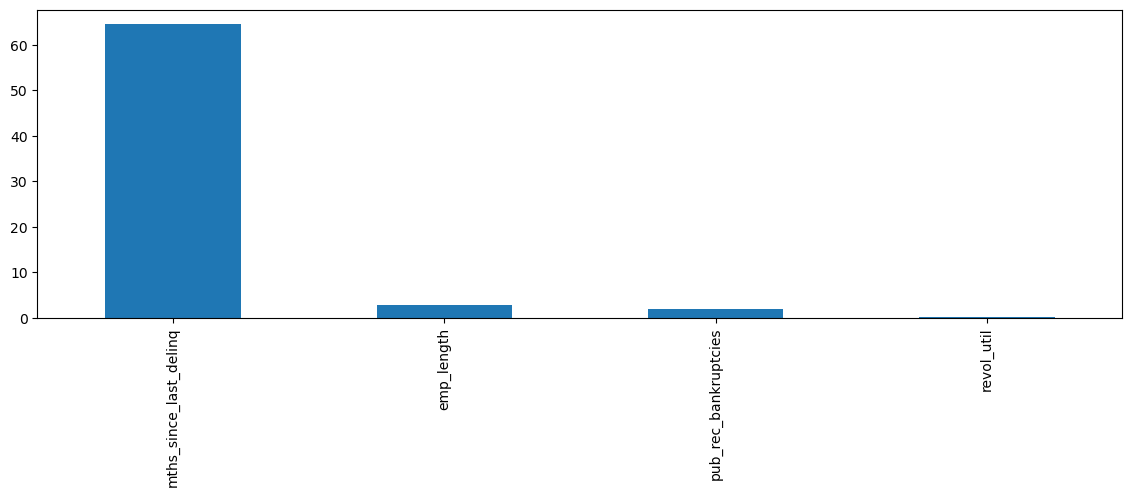

In [29]:
# check NAN columns again
# check nullratio
r_null = 100*(df.isnull().sum()/len((df)))
null_colummns = r_null[r_null > 0].sort_values(ascending = False)
print(f'number of columns with null values per total columns: {len(null_colummns)}/{len(df.columns)}')
null_colummns.plot(kind='bar',figsize=(14,4))
plt.show()


In [30]:
null_colummns

mths_since_last_delinq    64.559193
emp_length                 2.677761
pub_rec_bankruptcies       1.806776
revol_util                 0.129611
dtype: float64

In [31]:
# pub_rec_bankruptcies and emp_length have less nan so I decide to drop rows
print('total row before dropping:', df.shape[0])
df = df.dropna(subset=['emp_length','pub_rec_bankruptcies'])
print('total row after dropping:', df.shape[0])

total row before dropping: 38577
total row after dropping: 36847


In [32]:
df['mths_since_last_delinq'] = df['mths_since_last_delinq'].fillna(0)

# Univatiate Analysis

## analys to drop outlier

In [33]:
def univariate_analysis1(df, column):
    df1= df[df['loan_status']=='Fully Paid']
    df2 = df[df['loan_status']=='Charged Off']
    _, p = plt.subplots(2,2, figsize=(16, 4))
    sns.distplot(df1.loc[df1[column].notnull(), column], kde=True, hist=True, ax=p[0][0])
    sns.boxplot(x=column, data=df1, ax=p[0][1])
    sns.distplot(df2.loc[df2[column].notnull(), column], kde=True, hist=True, ax=p[1][0])
    sns.boxplot(x=column, data=df2, ax=p[1][1])
    p[0][0].set_xlabel(f'{column}_Fully Paid')
    p[0][1].set_xlabel(f'{column}_Fully Paid')
    p[1][0].set_xlabel(f'{column}_Charged Off')
    p[1][1].set_xlabel(f'{column}_Charged Off')
    plt.tight_layout()
    plt.show()

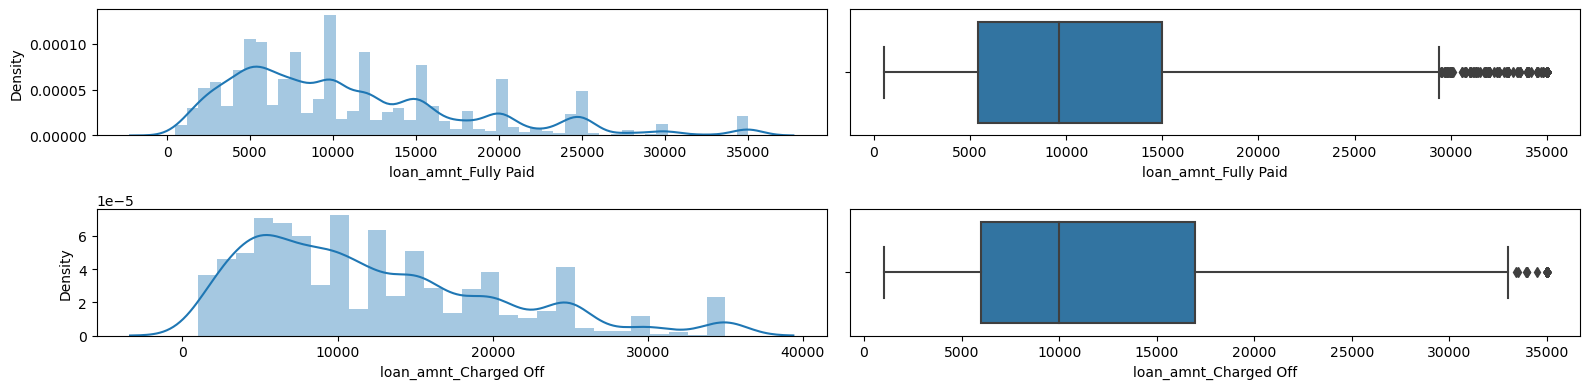

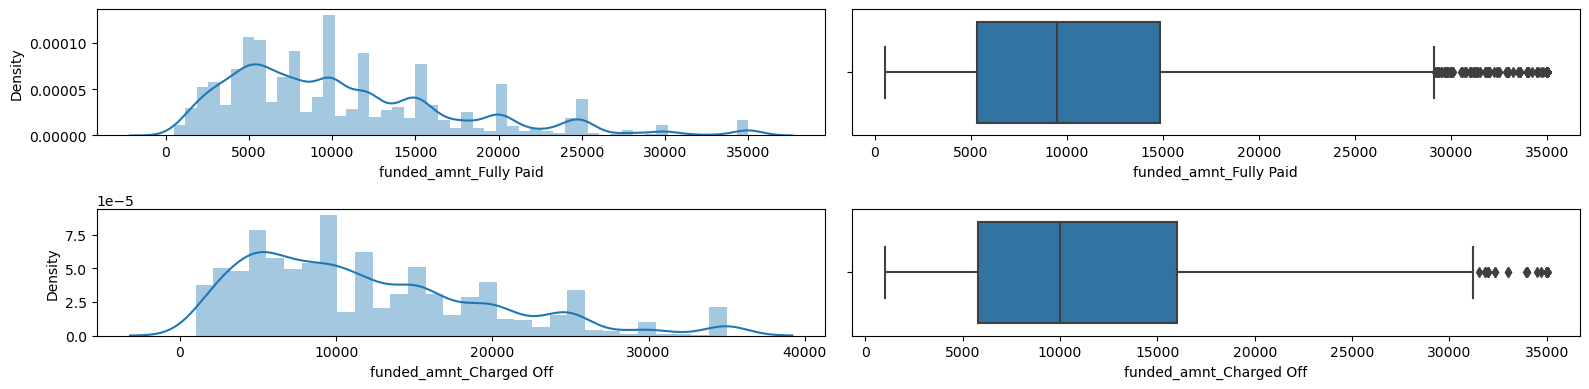

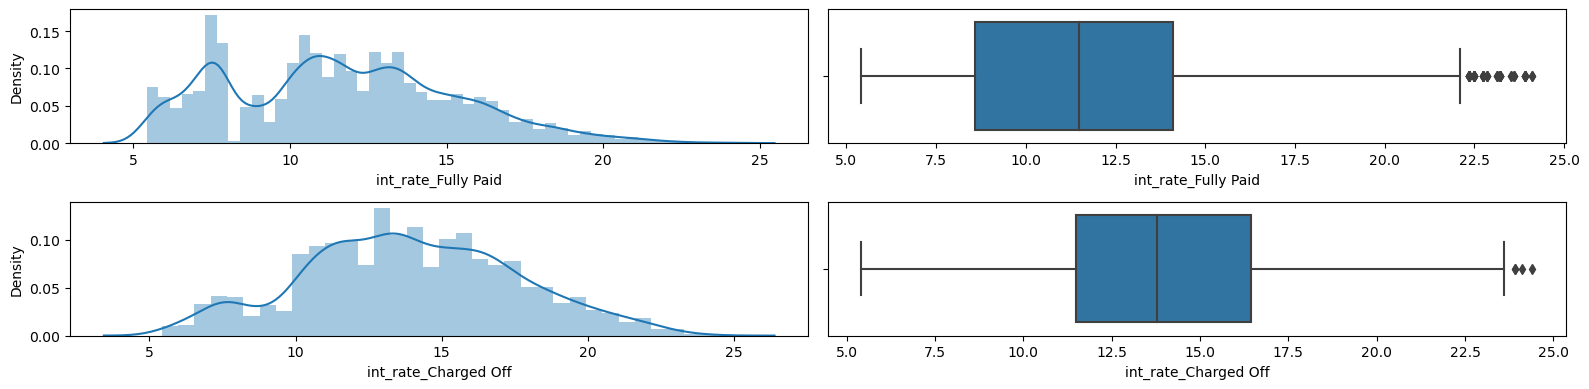

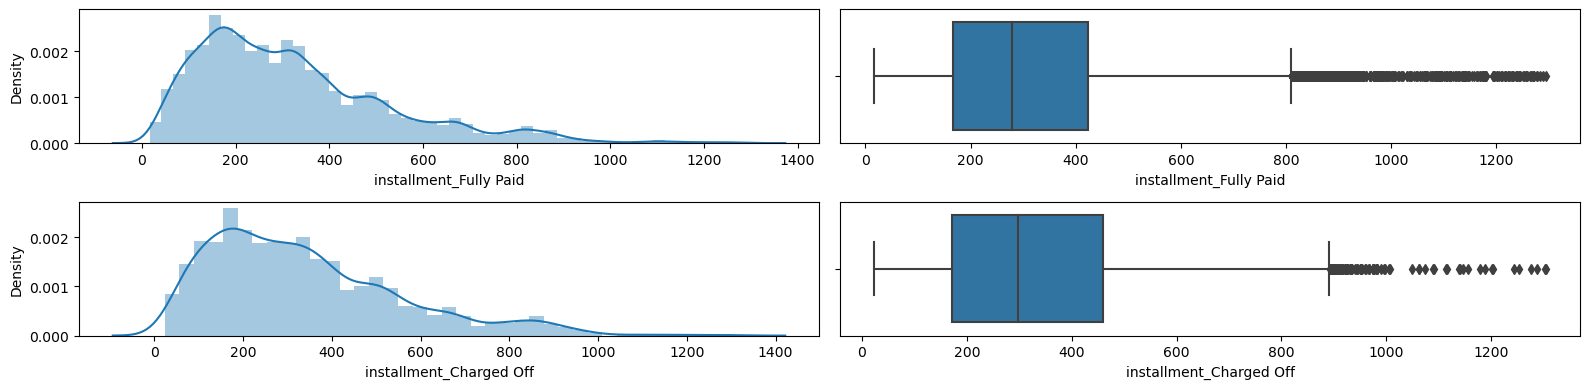

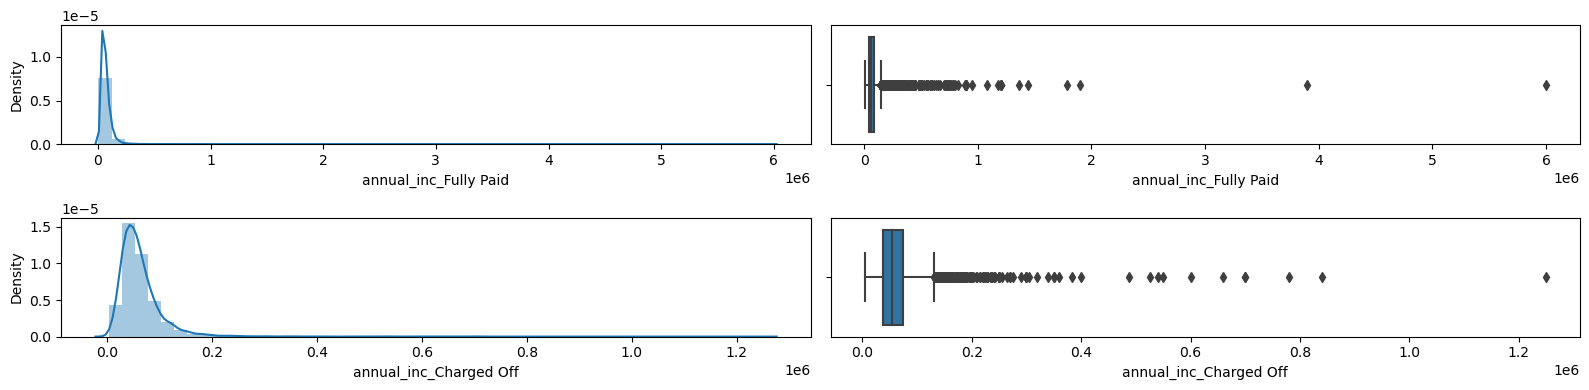

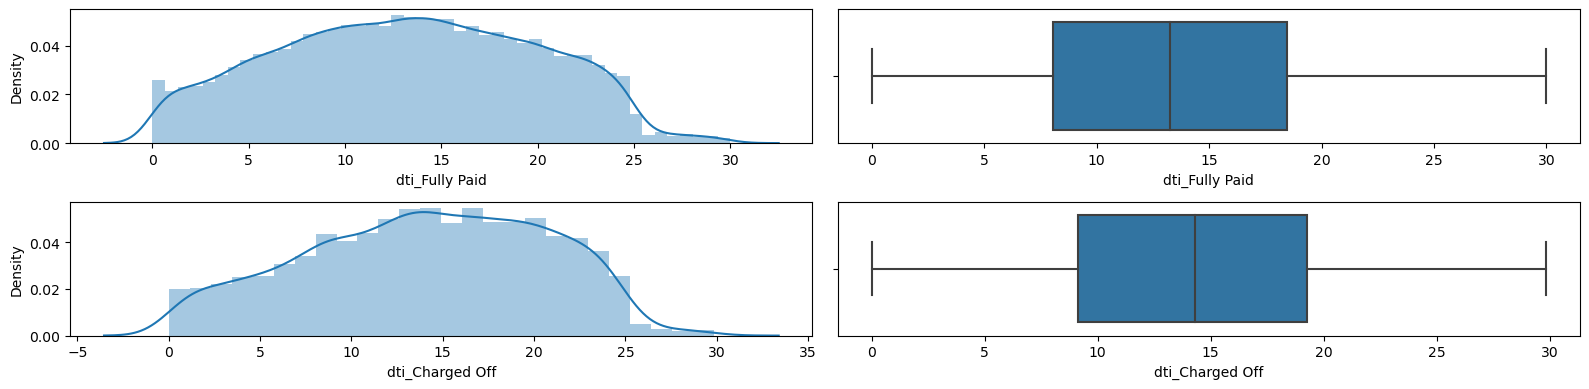

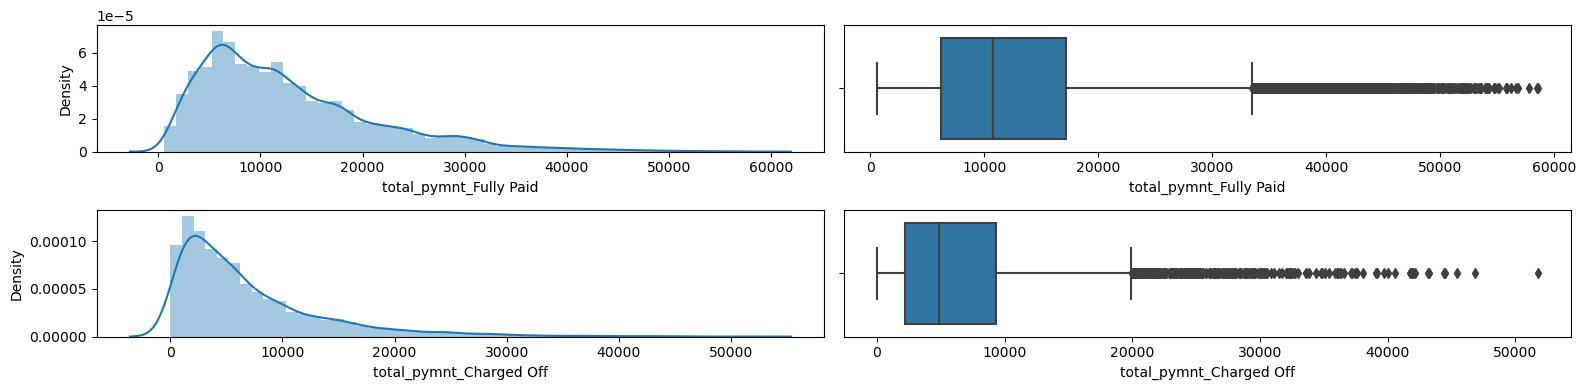

In [34]:
ana_boxplot_columns = ['loan_amnt', 'funded_amnt','int_rate', 'installment',
                        'annual_inc', 'dti','total_pymnt']
for c in ana_boxplot_columns:
    univariate_analysis1(df, c)

In [35]:
def drop_outliner(df, col):
    old_rows = len(df)
    q25 = df[col].quantile(0.25)
    q75 = df[col].quantile(0.75)
    iqr = q75 - q25
    upper = q75 + 1.5 * iqr
    new_df = df[df[col] < upper]
    new_rows = len(new_df)
    print('Percentage of dropped row: ', round((old_rows - new_rows)/old_rows*100,2), "%")
    return new_df

In [36]:
ana_boxplot_columns = ['loan_amnt', 'funded_amnt','int_rate', 'installment', 'annual_inc', 'dti']
for c in ana_boxplot_columns:
    print(f'drop outlier for {c}')
    df= drop_outliner(df,c)

drop outlier for loan_amnt
Percentage of dropped row:  2.93 %
drop outlier for funded_amnt
Percentage of dropped row:  0.08 %
drop outlier for int_rate
Percentage of dropped row:  0.18 %
drop outlier for installment
Percentage of dropped row:  2.92 %
drop outlier for annual_inc
Percentage of dropped row:  4.33 %
drop outlier for dti
Percentage of dropped row:  0.0 %


## plot with value_count

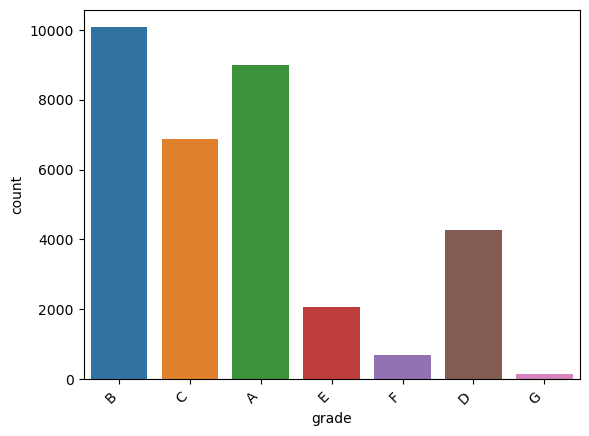

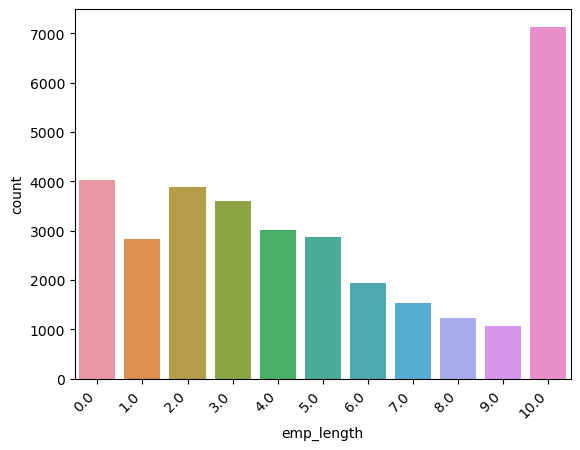

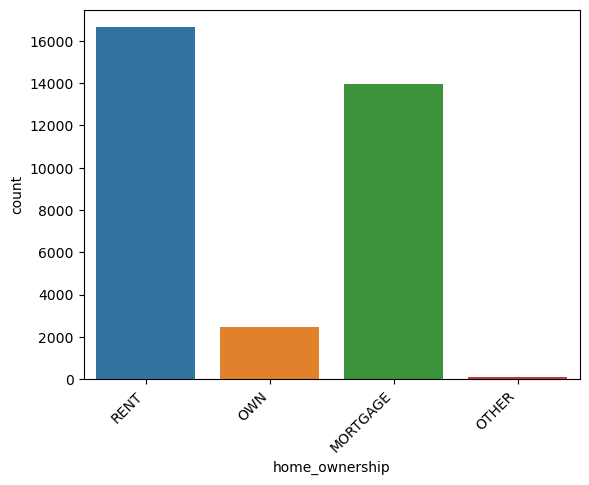

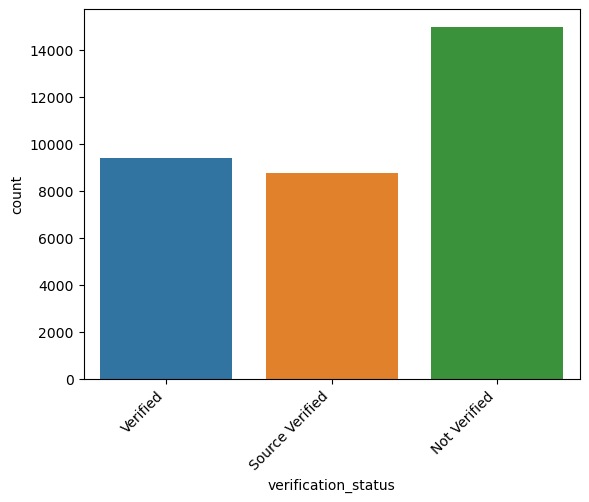

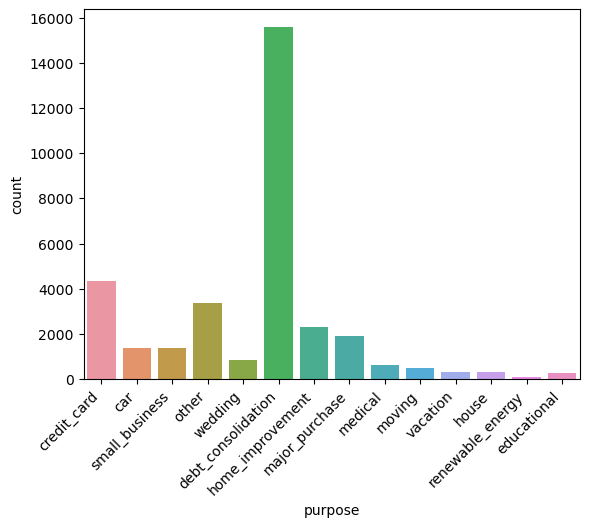

In [37]:
vc_column = ['grade','emp_length', 'home_ownership','verification_status','purpose']
for c in vc_column:
    ax = sns.countplot(data=df, x=c)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right') 
    plt.show()

## plot with line 

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33135 entries, 0 to 39680
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   loan_amnt               33135 non-null  int64  
 1   funded_amnt             33135 non-null  int64  
 2   term                    33135 non-null  int64  
 3   int_rate                33135 non-null  float64
 4   installment             33135 non-null  float64
 5   grade                   33135 non-null  object 
 6   emp_length              33135 non-null  float64
 7   home_ownership          33135 non-null  object 
 8   annual_inc              33135 non-null  float64
 9   verification_status     33135 non-null  object 
 10  loan_status             33135 non-null  object 
 11  purpose                 33135 non-null  object 
 12  zip_code                33135 non-null  object 
 13  dti                     33135 non-null  float64
 14  mths_since_last_delinq  33135 non-null

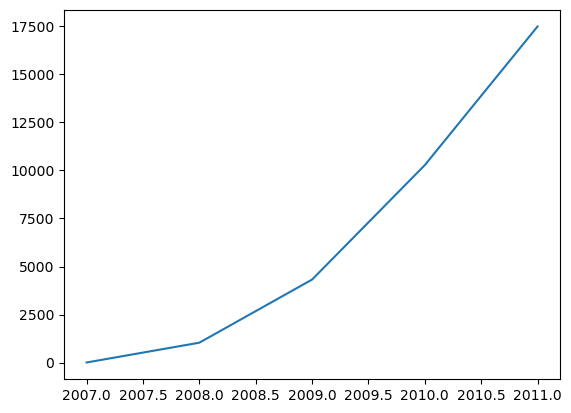

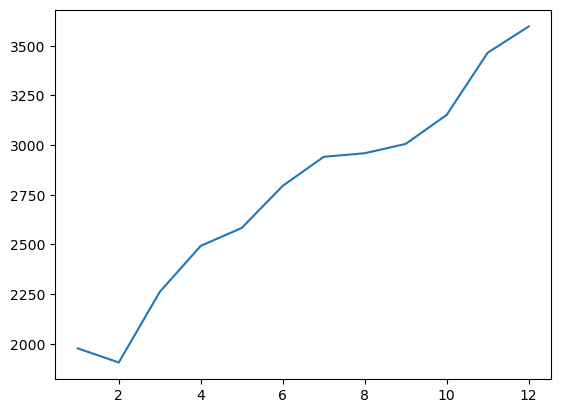

In [39]:
line_column = ['issue_y', 'issue_m']
for c in line_column:
    df[c].value_counts().sort_index().plot.line()
    plt.show()

# Bivatiate Analysis

In [ ]:
def boxplot(df,column):
    rw = df.pivot_table(index=column, columns='loan_status', values='funded_amnt', aggfunc=len).reset_index()
    rw['total'] = rw['Charged Off'] + rw['Fully Paid']
    rw['charge_off_ratio'] = round(rw['Charged Off'] / rw['total'] * 100)
    sns.set(style="whitegrid")
    _, p = plt.subplots(1,3, figsize=(16, 4))
    ax = sns.countplot(x=column, order=df[column].value_counts().index.sort_values(), data=df,hue='loan_status',ax=p[2])
    bx = rw.plot.bar(x=column, y =['Fully Paid','Charged Off'],stacked=True,ax=p[1]  )
    cx  = rw.plot.bar(x=column, y ='charge_off_ratio',stacked=True,ax=p[0] )
    # Annotate the bars with count values
    for p in ax.patches:
        ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(df))), (p.get_x()+0.05, p.get_height()+20))     
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right') 
    ax.set_xlabel('ratio per total for detail')
    bx.set_xlabel('ratio per total')
    cx.set_xlabel('charged_off_ratio from each value')
    plt.tight_layout()
    plt.show()

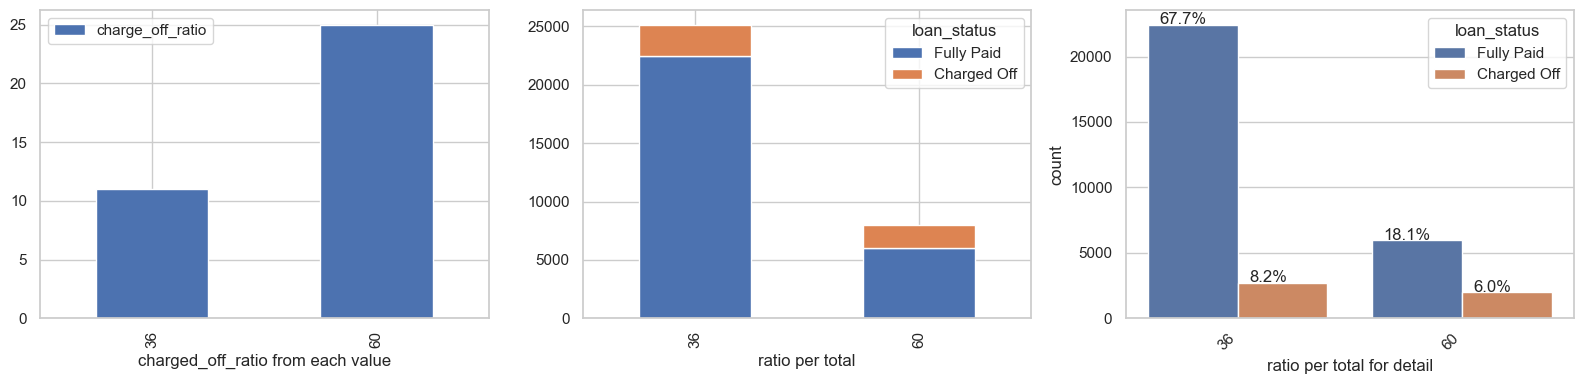

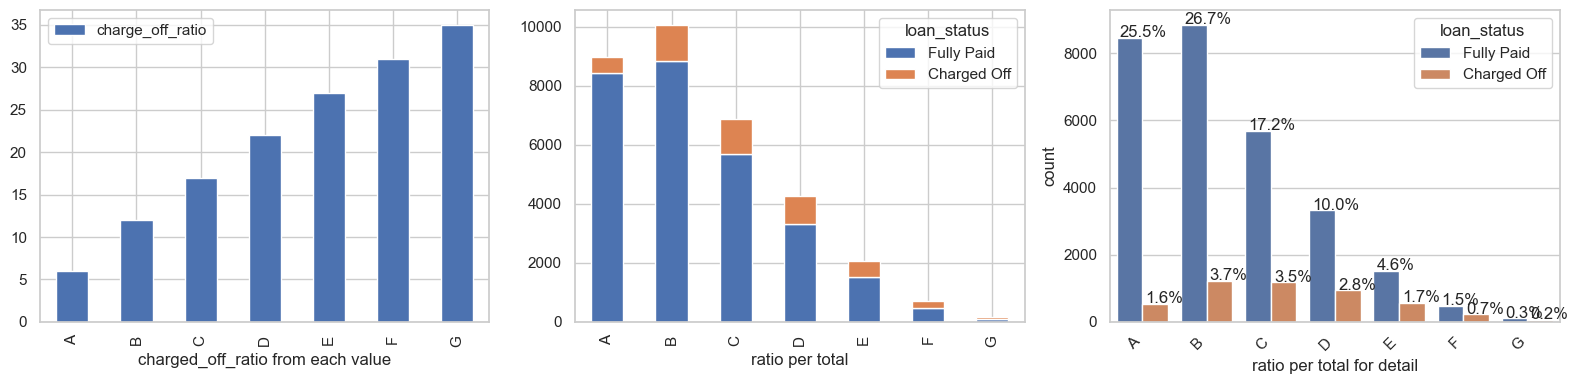

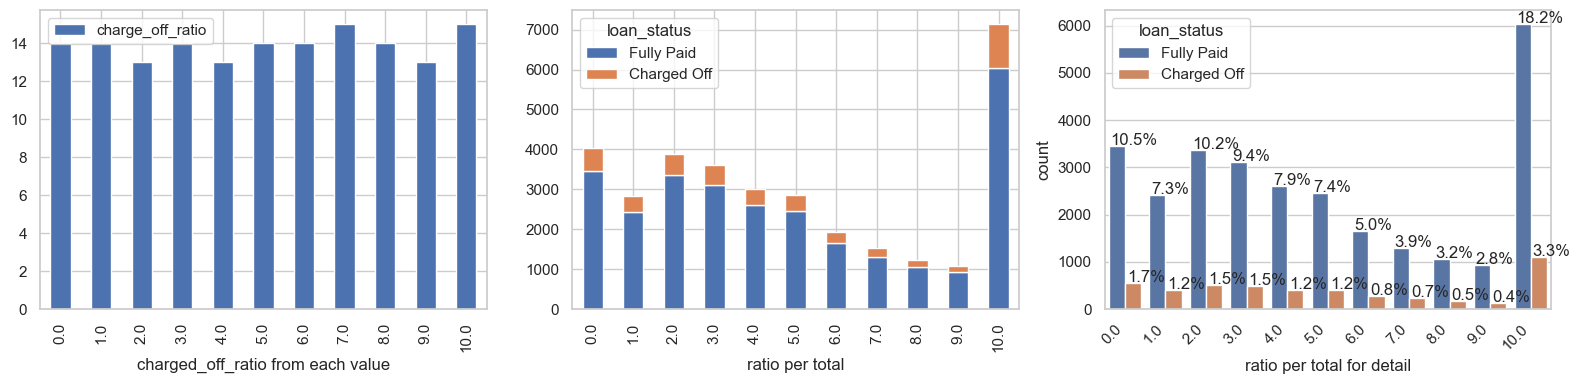

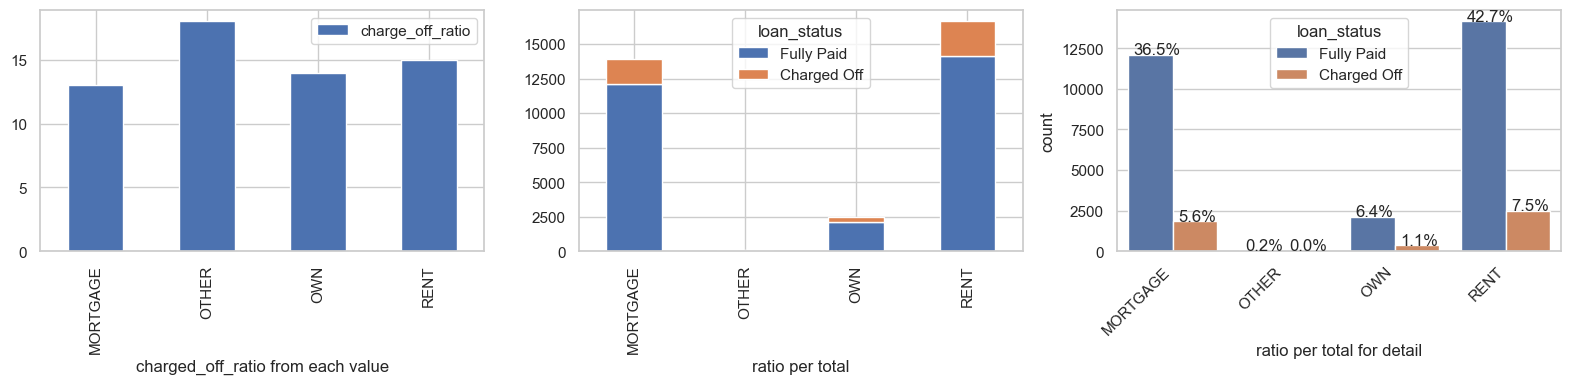

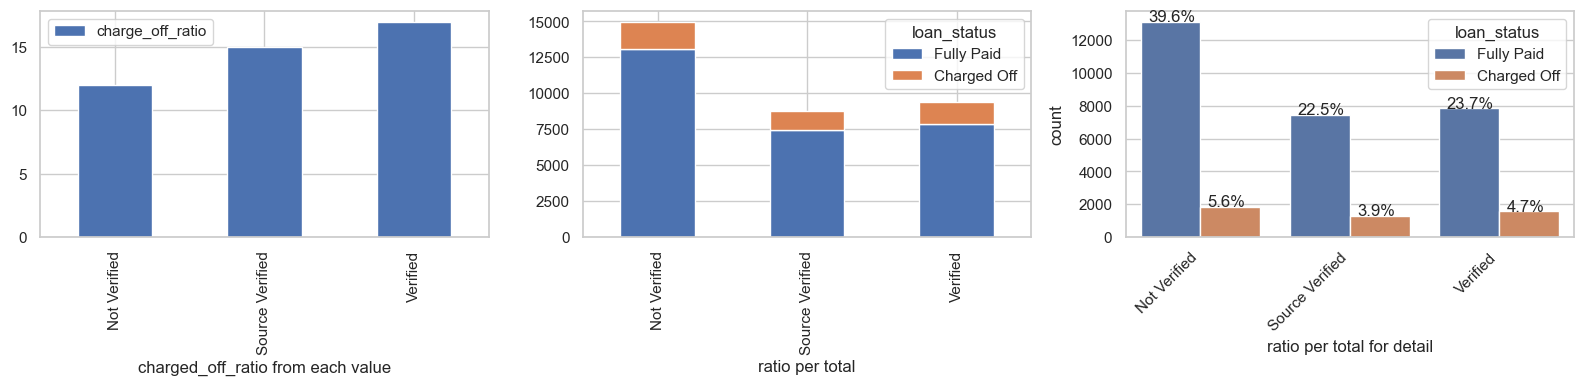

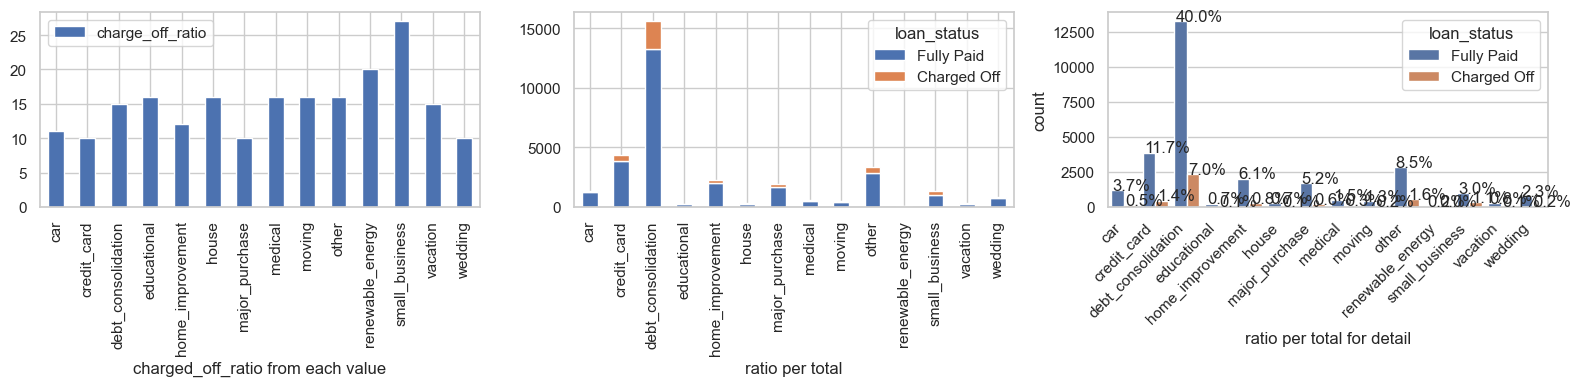

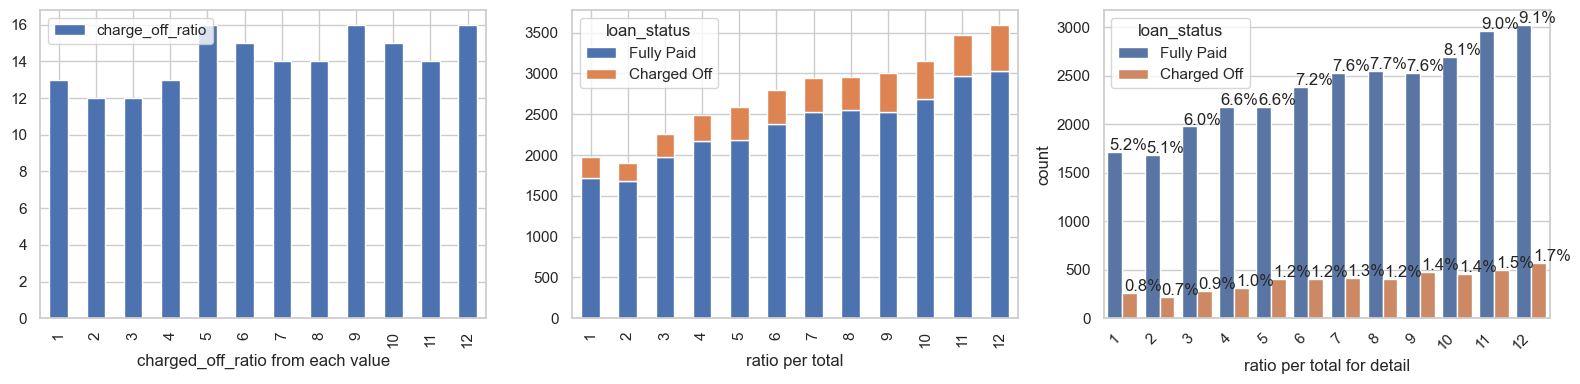

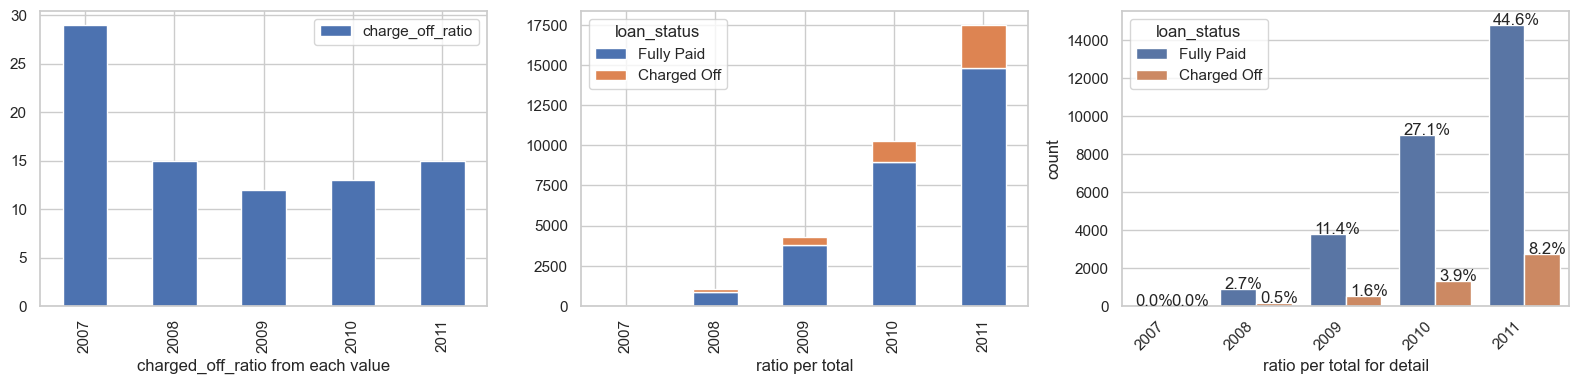

In [ ]:
# emp_length is not a useful separable feature as there are all the lengths for each status
countplot_coulumns = ['term','grade','emp_length','home_ownership','verification_status',
                      'purpose','issue_m','issue_y' ]
for c in countplot_coulumns:
    boxplot(df,c)

## top 7 zip_code

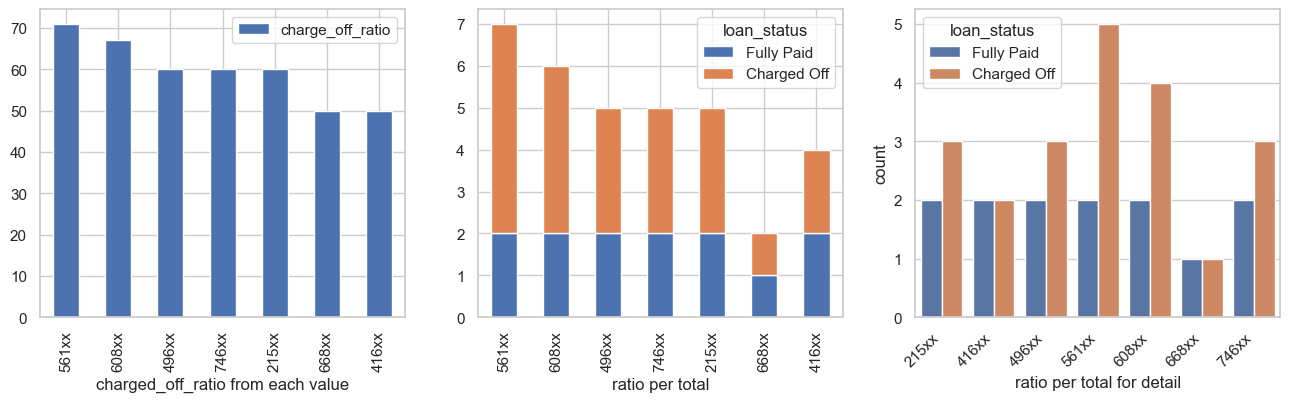

In [47]:
column = 'zip_code'
rw = df.pivot_table(index=column, columns='loan_status', values='funded_amnt', aggfunc=len).reset_index()
rw['total'] = rw['Charged Off'] + rw['Fully Paid']
rw['charge_off_ratio'] = round(rw['Charged Off'] / rw['total'] * 100)
rw_sorted = rw.sort_values(by='charge_off_ratio', ascending=False)
top_zip_codes  =  rw_sorted.head(7)
sns.set(style="whitegrid")
_, p = plt.subplots(1,3, figsize=(16, 4))

ax = sns.countplot(x=column, order=top_zip_codes['zip_code'].value_counts().index.sort_values(), data=df,hue='loan_status',ax=p[2])
bx = top_zip_codes.plot.bar(x=column, y =['Fully Paid','Charged Off'],stacked=True,ax=p[1]  )
cx  = top_zip_codes.plot.bar(x=column, y ='charge_off_ratio',stacked=True,ax=p[0] )
# Annotate the bars with count values
for p in ax.patches:
    ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(df))), (p.get_x()+0.05, p.get_height()+20))     
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right') 
ax.set_xlabel('ratio per total for detail')
bx.set_xlabel('ratio per total')
cx.set_xlabel('charged_off_ratio from each value')
plt.show()

In [49]:
rw

loan_status,zip_code,Charged Off,Fully Paid,total,charge_off_ratio
0,010xx,13.0,74.0,87.0,15.0
1,011xx,1.0,13.0,14.0,7.0
2,012xx,1.0,9.0,10.0,10.0
3,013xx,3.0,8.0,11.0,27.0
4,014xx,6.0,24.0,30.0,20.0
...,...,...,...,...,...
796,995xx,4.0,24.0,28.0,14.0
797,996xx,2.0,7.0,9.0,22.0
798,997xx,5.0,10.0,15.0,33.0
799,998xx,NaN,10.0,NaN,NaN


In [ ]:
## Zipcode and grade and purpuse

## Correlation

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33135 entries, 0 to 39680
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   loan_amnt               33135 non-null  int64  
 1   funded_amnt             33135 non-null  int64  
 2   term                    33135 non-null  int64  
 3   int_rate                33135 non-null  float64
 4   installment             33135 non-null  float64
 5   grade                   33135 non-null  object 
 6   emp_length              33135 non-null  float64
 7   home_ownership          33135 non-null  object 
 8   annual_inc              33135 non-null  float64
 9   verification_status     33135 non-null  object 
 10  loan_status             33135 non-null  object 
 11  purpose                 33135 non-null  object 
 12  zip_code                33135 non-null  object 
 13  dti                     33135 non-null  float64
 14  mths_since_last_delinq  33135 non-null

In [ ]:
corr_columns= ['loan_amnt','funded_amnt','funded_amnt_inv', 'int_rate','installment','emp_length','annual_inc','dti', 'mths_since_last_delinq','pub_rec_bankruptcies']
corr = df[corr_columns].corr()
sns.set(font_scale=1.1)
sns.clustermap(corr, annot=True, figsize=(12, 8), cmap="Blues")
plt.show()

KeyError: "['funded_amnt_inv'] not in index"